In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
housing = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.dropna(inplace=True)

In [7]:
from sklearn.model_selection import train_test_split
x = housing.drop(['median_house_value'], axis=1)
y = housing['median_house_value']

In [8]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
train_housing = x_train.join(y_train)

In [12]:
train_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10486,-117.68,33.48,15.0,1786.0,299.0,727.0,293.0,5.0527,<1H OCEAN,231400.0
4035,-118.52,34.17,20.0,17377.0,4457.0,7450.0,4204.0,3.2154,<1H OCEAN,259600.0
2293,-119.77,36.80,24.0,3748.0,770.0,1827.0,719.0,2.7222,INLAND,83100.0
6788,-118.15,34.09,52.0,2203.0,430.0,1238.0,403.0,4.4306,<1H OCEAN,225800.0
16788,-122.46,37.67,16.0,3372.0,1101.0,2049.0,1021.0,4.1303,NEAR OCEAN,146500.0
...,...,...,...,...,...,...,...,...,...,...
5228,-118.24,33.94,37.0,869.0,241.0,1040.0,233.0,2.0000,<1H OCEAN,84200.0
4221,-118.26,34.12,52.0,1942.0,476.0,1375.0,477.0,2.7348,<1H OCEAN,209100.0
20081,-120.31,38.02,11.0,2366.0,398.0,1046.0,387.0,3.8203,INLAND,139700.0
3832,-118.44,34.20,36.0,2698.0,623.0,1544.0,554.0,2.7375,<1H OCEAN,234900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

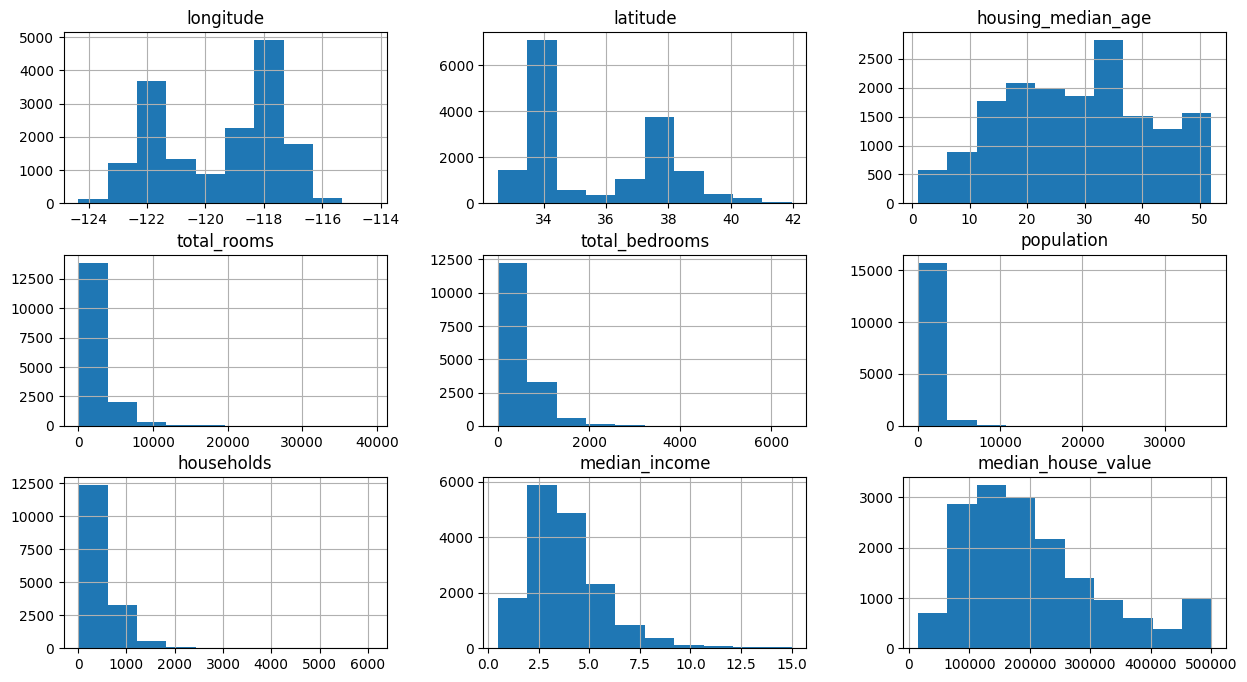

In [13]:
train_housing.hist(figsize=(15, 8))

In [14]:
train_housing['total_rooms'] = np.log(train_housing['total_rooms']+1)
train_housing['total_bedrooms'] = np.log(train_housing['total_bedrooms']+1)
train_housing['population'] = np.log(train_housing['population']+1)
train_housing['households'] = np.log(train_housing['households']+1)

In [15]:
train_housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7166
INLAND        5253
NEAR OCEAN    2100
NEAR BAY      1823
ISLAND           4
Name: count, dtype: int64

In [16]:
train_housing = train_housing.join(pd.get_dummies(train_housing.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [17]:
train_housing['bedroom_ratio']=train_housing['total_bedrooms']/train_housing['total_rooms']
train_housing['household_rooms']=train_housing['total_rooms']/train_housing['households']

In [18]:
np.any(np.isnan(train_housing))

False

In [19]:
from sklearn.linear_model import LinearRegression
x_train, y_train = train_housing.drop(['median_house_value'], axis=1), train_housing['median_house_value']
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [20]:
test_housing = x_test.join(y_test)

test_housing['total_rooms'] = np.log(test_housing['total_rooms']+1)
test_housing['total_bedrooms'] = np.log(test_housing['total_bedrooms']+1)
test_housing['population'] = np.log(test_housing['population']+1)
test_housing['households'] = np.log(test_housing['households']+1)

test_housing = test_housing.join(pd.get_dummies(test_housing.ocean_proximity)).drop(['ocean_proximity'], axis=1)


test_housing['bedroom_ratio']=test_housing['total_bedrooms']/test_housing['total_rooms']
test_housing['household_rooms']=test_housing['total_rooms']/test_housing['households']


In [21]:
x_test, y_test = test_housing.drop(['median_house_value'], axis=1), test_housing['median_house_value']

In [22]:
test_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
5679,-118.29,33.71,40.0,7.405496,6.156979,6.660575,6.033086,3.1071,464300.0,False,False,False,False,True,0.831407,1.227480
12376,-116.33,33.75,5.0,9.857862,8.274867,7.965893,7.227662,4.0360,158500.0,False,True,False,False,False,0.839418,1.363907
20475,-118.75,34.26,24.0,7.711997,5.924256,7.189922,5.950643,5.4604,193400.0,True,False,False,False,False,0.768187,1.295994
8288,-118.15,33.77,27.0,8.020928,6.669498,7.243513,6.617403,3.5528,271100.0,False,False,False,False,True,0.831512,1.212096
14875,-117.08,32.63,33.0,7.969704,6.677083,7.382746,6.626718,2.1281,139800.0,False,False,False,False,True,0.837808,1.202662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19212,-122.71,38.45,39.0,7.915713,6.352629,7.109879,6.345636,2.9663,185400.0,True,False,False,False,False,0.802534,1.247426
1556,-121.96,37.81,12.0,8.777864,6.658011,7.785305,6.641182,8.3188,403400.0,True,False,False,False,False,0.758500,1.321732
4061,-118.45,34.15,10.0,6.995766,5.564520,6.249975,5.587249,4.1727,332600.0,True,False,False,False,False,0.795413,1.252095
10091,-117.97,33.93,33.0,7.438972,5.913503,6.889591,5.894403,4.5461,194000.0,True,False,False,False,False,0.794936,1.262040


In [23]:
reg.score(x_test, y_test)

0.6473588601638409

In [24]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [25]:
forest.score(x_test, y_test)

0.8151155408346648